# DATA PREPERATION


In [8]:
!pip install --upgrade pip
!pip install -r requirements.txt

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [21]:
import pickle
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import joblib 
import torch.nn as nn 
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import torch
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader


# LOAD DATA

In [10]:
with open('data_withSeg_reshaped.pickle', 'rb') as f:
  healthy_data = pickle.load(f)
with open('ms_data_withSeg_reshaped.pickle', 'rb') as f:
  unhealthy_data = pickle.load(f)

In [11]:
print(len(healthy_data["data"]))

1059610


In [12]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU available")

False
0
No GPU available


In [22]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [23]:
X = healthy_data['data']
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)


In [15]:
np.shape(X)

(1059610, 52)

In [16]:
np.shape(X_test)

(317883, 52)

In [17]:
# Convert to PyTorch tensor and move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.FloatTensor(X_train).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)
print(device)

cpu


# AUTOENCODER TRAINING

In [18]:


# class Autoencoder(nn.Module):
#     def __init__(self, input_dim):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Linear(32, 16)
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(16, 32),
#             nn.ReLU(),
#             nn.Linear(32, 64),
#             nn.ReLU(),
#             nn.Linear(64, input_dim)
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

# # Initialize the model
# input_dim = X_train_tensor.shape[1]
# model = Autoencoder(input_dim).to(device)

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters())

# # Train the model
# num_epochs = 50
# batch_size = 130

# for epoch in range(num_epochs):
#     for i in range(0, X_train_tensor.shape[0], batch_size):
#         batch = X_train_tensor[i:i+batch_size]

#         # Forward pass
#         outputs = model(batch)
#         loss = criterion(outputs, batch)

#         # Backward pass and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     if (epoch + 1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


SAVE AUTOENCODER

In [19]:
# import torch

# # # Assuming your autoencoder is named 'model'
# torch.save(model.state_dict(), 'autoencoder_model.pth')

# # If you want to save the entire model (including the architecture)
# torch.save(model, 'autoencoder_full_model.pth')

# LOAD AUTOENCODER 

In [ ]:

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),  
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),  
            nn.ReLU(),
            nn.Linear(16, 8),  
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid() 
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        return encoded 

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = Autoencoder(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
num_epochs = 50
batch_size = 130

for epoch in range(num_epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        batch = X_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(batch)
        loss = criterion(outputs, batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

C:\Users\Abeer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([130, 52])) that is different to the input size (torch.Size([130, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Abeer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([77, 52])) that is different to the input size (torch.Size([77, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/50], Loss: 0.0337


KeyboardInterrupt: 

In [ ]:
print("Successfully encoded data into encoded_train and encoded_test")

Successfully encoded data into encoded_train and encoded_test


# ENCODER TRAIN TEST

In [ ]:

# Ensure the model is in evaluation mode
loaded_model.eval()
with torch.no_grad():
    encoded_train = loaded_model.encoder(X_train_tensor).cpu().numpy()
    encoded_test = loaded_model.encoder(X_test_tensor).cpu().numpy()


In [ ]:
print(f"Encoded train data shape: {encoded_train.shape}")
print(f"Encoded test data shape: {encoded_test.shape}")

Encoded train data shape: (741727, 16)
Encoded test data shape: (317883, 16)


# ISOLATION FOREST TRAINING

In [ ]:
print("Trainng IF")

Trainng IF


In [ ]:

# contamination = 0.5
# # Isolation Forest
if_params = {
    'n_estimators': 100
}

if_model = IsolationForest(**if_params)
if_model.fit(encoded_train)
if_scores_test = if_model.score_samples(encoded_test)
if_predictions = if_model.predict(encoded_test)
joblib.dump(if_model, 'isolation_forest_model.joblib')


['isolation_forest_model.joblib']

In [ ]:
if_model = joblib.load('isolation_forest_model.joblib')
# Use the loaded models for prediction
if_scores_test = -if_model.score_samples(encoded_test)
if_predictions = if_model.predict(encoded_test)

print("Isolation Forest anomalies:", sum(if_predictions == 1))
print("Isolation Forest total:", len(if_predictions))

Isolation Forest anomalies: 288025
Isolation Forest total: 317883


In [ ]:
# if_params = if_model.get_params()
# print(if_params)

In [ ]:
model = loaded_model

# ISOLATION FOREST METRICS

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print("ISOLATION FOREST METRICS")
print("=======================================================================================")
y_true = np.ones(len(if_predictions))
print(f"Number of anomalies: {np.sum(if_predictions == -1)}")
print(f"Number of Non-Anomalies: {np.sum(if_predictions == 1)}")
print(f"Total number of instances: {len(if_predictions)}")

# Calculate metrics
accuracy = accuracy_score(y_true, if_predictions)
precision = precision_score(y_true, if_predictions, pos_label=1)
recall = recall_score(y_true, if_predictions, pos_label=1)
f1 = f1_score(y_true, if_predictions, pos_label=1)
specificity = recall_score(y_true, if_predictions, pos_label=-1)
bta = (recall + specificity) / 2

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, if_predictions).ravel()

# Print all metrics
print(f"\nIF model metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"Balanced Test Accuracy (BTA): {bta:.4f}")

print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

ISOLATION FOREST METRICS
Number of anomalies: 29858
Number of Non-Anomalies: 288025
Total number of instances: 317883


C:\Users\Abeer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



IF model metrics:
Accuracy: 0.9061
Precision: 1.0000
Recall (Sensitivity): 0.9061
Specificity: 0.0000
F1 score: 0.9507
Balanced Test Accuracy (BTA): 0.4530

Confusion Matrix:
True Negatives: 0
False Positives: 0
False Negatives: 29858
True Positives: 288025


# OCSVM TRAINING

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

class OCSVM(nn.Module):
    def __init__(self, input_dim, kernel='rbf', gamma='scale', nu=0.1):
        super(OCSVM, self).__init__()
        self.input_dim = input_dim
        self.kernel = kernel
        self.gamma = gamma
        self.nu = nu
        self.support_vectors = nn.Parameter(torch.randn(1, input_dim))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        if self.kernel == 'rbf':
            if self.gamma == 'scale':
                gamma = 1.0 / (self.input_dim * x.var())
            else:
                gamma = self.gamma
            dists = torch.cdist(x, self.support_vectors, p=2).pow(2)
            kernel_output = torch.exp(-gamma * dists)
        else:
            kernel_output = torch.mm(x, self.support_vectors.t())
        return kernel_output - self.bias

    def fit(self, X, lr=0.01, n_epochs=100, batch_size=32):
        X = self._ensure_tensor(X)
        optimizer = optim.Adam(self.parameters(), lr=lr)
        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        for epoch in range(n_epochs):
            total_loss = 0
            for batch in dataloader:
                x = batch[0]
                optimizer.zero_grad()
                scores = self.forward(x)
                loss = self.ocsvm_loss(scores)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            
            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {total_loss/len(dataloader):.4f}")

    def ocsvm_loss(self, scores):
        hinge_loss = torch.mean(torch.max(torch.zeros_like(scores), -scores + 1))
        regularization = 0.5 * (self.support_vectors ** 2).sum()
        return hinge_loss + regularization - self.bias

    def predict(self, X):
        X = self._ensure_tensor(X)
        with torch.no_grad():
            scores = self.forward(X)
        return (scores >= 0).float() * 2 - 1  # Convert to 1 (inlier) and -1 (outlier)

    def score_samples(self, X):
        X = self._ensure_tensor(X)
        with torch.no_grad():
            return self.forward(X)

    def _ensure_tensor(self, X):
        if isinstance(X, np.ndarray):
            return torch.from_numpy(X).float().to(self.support_vectors.device)
        elif isinstance(X, torch.Tensor):
            return X.to(self.support_vectors.device)
        else:
            raise TypeError("Input must be either a numpy array or a PyTorch tensor")


In [ ]:
print("Training OCSVM")

Training OCSVM


# LOADING OCSVM

In [ ]:

# if __name__ == "__main__":
#     # Set device
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")

#     # Load your data
#     X_train = encoded_train
#     X_test = encoded_test
#     # Check the shape of your data
#     print(f"Training data shape: {X_train.shape}")
#     print(f"Test data shape: {X_test.shape}")

#     # Initialize and train the model
#     input_dim = X_train.shape[1]  # Get the correct input dimension from your data
#     ocsvm_model = OCSVM(input_dim=input_dim, kernel='rbf', gamma='scale', nu=0.1).to(device)
#     ocsvm_model.fit(X_train, lr=0.01, n_epochs=50, batch_size=132)
#     joblib.dump(ocsvm_model, 'one_class_svm_model.joblib')


In [ ]:

ocsvm_model = joblib.load('one_class_svm_model.joblib')
ocsvm_scores_test = ocsvm_model.score_samples(encoded_test)
ocsvm_predictions = ocsvm_model.predict(encoded_test)
ocsvm_predictions_np = ocsvm_predictions.cpu().numpy()
ocsvm_predictions = ocsvm_predictions_np
# Count anomalies (where prediction is -1)
anomaly_count = np.sum(ocsvm_predictions_np !=1)

print("OCSVM anomalies:", anomaly_count)
print("OCSVM total:", len(ocsvm_predictions))


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
np.unique(ocsvm_predictions_np)

array([1.], dtype=float32)

In [ ]:

print("Isolation Forest anomalies:", sum(if_predictions == -1))
print("OCSVM anomales :", sum(ocsvm_predictions_np == -1))

Isolation Forest anomalies: 28539
OCSVM anomales : [0]


# OCSVM METRICS

In [ ]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print("OCSVM METRICS")
print("=======================================================================================")
def calculate_ocsvm_metrics(ocsvm_predictions):
    # Convert PyTorch tensor to NumPy array if necessary
    if isinstance(ocsvm_predictions, torch.Tensor):
        ocsvm_predictions = ocsvm_predictions.cpu().numpy()

    # Assuming all true labels are 1 (non-anomalies)
    y_true = np.ones(len(ocsvm_predictions))
    
    num_anomalies = np.sum(ocsvm_predictions == -1)
    num_non_anomalies = np.sum(ocsvm_predictions == 1)
    
    print(f"Number of anomalies: {num_anomalies}")
    print(f"Number of Non-Anomalies: {num_non_anomalies}")
    print(f"Total number of instances: {len(ocsvm_predictions)}")

    # Check if all predictions are the same
    if num_anomalies == 0 or num_non_anomalies == 0:
        print("Warning: All predictions are the same. Metrics may not be meaningful.")
        if num_anomalies == 0:
            print("All instances were classified as non-anomalies (1).")
            tn, fp, fn, tp = 0, 0, 0, len(ocsvm_predictions)
        else:
            print("All instances were classified as anomalies (-1).")
            tn, fp, fn, tp = len(ocsvm_predictions), 0, 0, 0
    else:
        # Calculate confusion matrix
        cm = confusion_matrix(y_true, ocsvm_predictions)
        tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_true, ocsvm_predictions) *100
    precision = precision_score(y_true, ocsvm_predictions, pos_label=1, zero_division=0)
    recall = recall_score(y_true, ocsvm_predictions, pos_label=1, zero_division=0)
    f1 = f1_score(y_true, ocsvm_predictions, pos_label=1, zero_division=0)
    
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    bta = (recall + specificity) / 2

    # Print all metrics
    print(f"\nOCSVM model metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"Balanced Test Accuracy (BTA): {bta:.4f}")

    print(f"\nConfusion Matrix:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")

# Usage:
# Assuming ocsvm_predictions is your OCSVM model's predictions
calculate_ocsvm_metrics(ocsvm_predictions)

OCSVM METRICS
Number of anomalies: 0
Number of Non-Anomalies: 317883
Total number of instances: 317883
All instances were classified as non-anomalies (1).

OCSVM model metrics:
Accuracy: 100.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 score: 1.0000
Balanced Test Accuracy (BTA): 0.5000

Confusion Matrix:
True Negatives: 0
False Positives: 0
False Negatives: 0
True Positives: 317883


# TESTING ON UNHEALTHY (ISOLATION)

In [ ]:



# Preprocess unhealthy data
X_unhealthy = unhealthy_data['data']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_unhealthy_tensor = torch.FloatTensor(X_unhealthy).to(device)


In [ ]:

# Load the trained autoencoder
loaded_model = torch.load('autoencoder_full_model.pth')
loaded_model.eval()

# Encode unhealthy data
with torch.no_grad():
    encoded_unhealthy = loaded_model.encoder(X_unhealthy_tensor).cpu().numpy()

# Load the trained Isolation Forest model
if_model = joblib.load('isolation_forest_model.joblib')

# Get anomaly scores for both healthy (encoded_test) and unhealthy data
healthy_scores = -if_model.score_samples(encoded_test)
unhealthy_scores = -if_model.score_samples(encoded_unhealthy)

# Prepare labels (0 for healthy, 1 for unhealthy)
y_true = np.concatenate([np.zeros(len(encoded_test)), np.ones(len(encoded_unhealthy))])
scores = np.concatenate([healthy_scores, unhealthy_scores])

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)


/tmp/ipykernel_12779/1156467231.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('autoencoder_full_model.pth')


# ISOALTION ROC

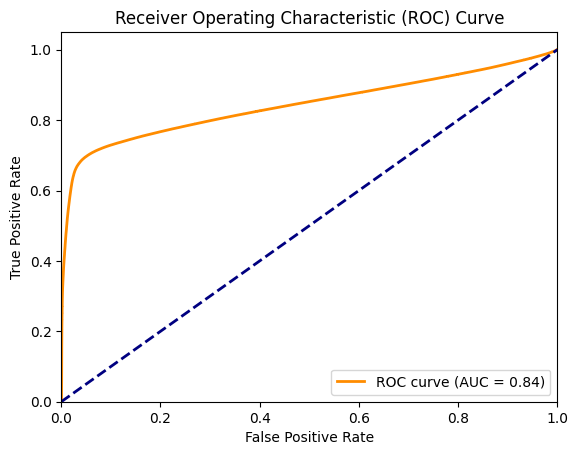

ROC AUC: 0.8428

Metrics at threshold 0.5:
Accuracy: 0.7478
Precision: 0.9823
Recall: 0.7243
F1 Score: 0.8338


In [ ]:

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"ROC AUC: {roc_auc:.4f}")

# Calculate some metrics at a specific threshold (e.g., 0.5)
threshold = 0.5
y_pred = (scores > threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nMetrics at threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# TEST ON UNHEALTHY (OCSVM)

In [ ]:



# Preprocess unhealthy data
X_unhealthy = unhealthy_data['data']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_unhealthy_tensor = torch.FloatTensor(X_unhealthy).to(device)


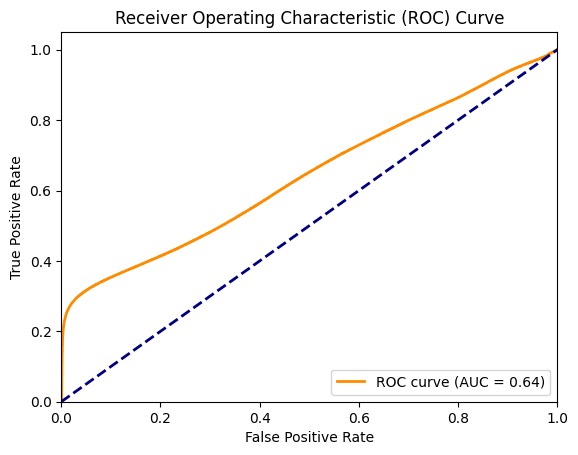

ROC AUC: 0.6420

Metrics at threshold 0.5:
Accuracy: 0.1266
Precision: nan
Recall: 0.0000
F1 Score: nan


/tmp/ipykernel_12779/4280380152.py:19: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [ ]:

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"ROC AUC: {roc_auc:.4f}")

# Calculate some metrics at a specific threshold (e.g., 0.5)
threshold = 0.5
y_pred = (scores > threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nMetrics at threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# RECONSTRUCTION ERROR (IGNORE) 

In [ ]:


# Preprocess data
X_healthy = healthy_data['data']
X_unhealthy = unhealthy_data['data']

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_healthy_tensor = torch.FloatTensor(X_healthy).to(device)
X_unhealthy_tensor = torch.FloatTensor(X_unhealthy).to(device)


In [ ]:

# Load the trained autoencoder
loaded_model = torch.load('autoencoder_full_model.pth')
loaded_model.eval()


/tmp/ipykernel_12779/1296950815.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('autoencoder_full_model.pth')


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=52, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=52, bias=True)
  )
)

In [ ]:

# Function to compute reconstruction error
def compute_reconstruction_error(model, data):
    with torch.no_grad():
        reconstructed = model(data)
        mse_loss = torch.nn.MSELoss(reduction='none')
        reconstruction_error = mse_loss(reconstructed, data).mean(axis=1)
    return reconstruction_error.cpu().numpy()


In [ ]:

# Compute reconstruction errors
healthy_errors = compute_reconstruction_error(loaded_model, X_healthy_tensor)
unhealthy_errors = compute_reconstruction_error(loaded_model, X_unhealthy_tensor)
print(f"Reconstruction error for Healthy: {healthy_errors}")
print(f"Reconstruction error for Unhalthy:{unhealthy_errors}")

Reconstruction error for Healthy: [0.00023735 0.00037712 0.00025036 ... 0.00053167 0.00049937 0.00047411]
Reconstruction error for Unhalthy:[0.00021176 0.00020948 0.00020943 ... 0.00016478 0.00018312 0.00016774]


In [ ]:

# Prepare labels and scores for ROC curve
y_true = np.concatenate([np.zeros(len(healthy_errors)), np.ones(len(unhealthy_errors))])
scores = np.concatenate([healthy_errors, unhealthy_errors])


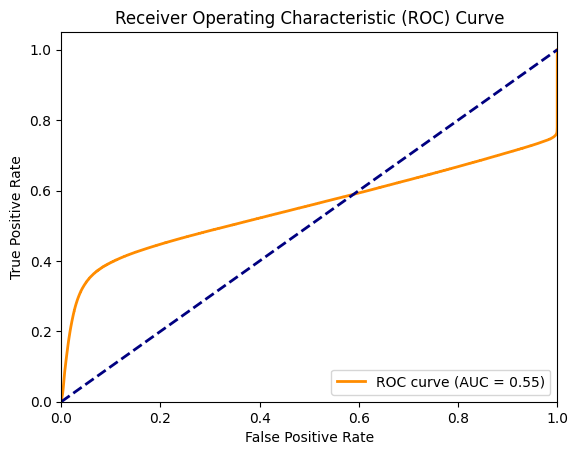

ROC AUC: 0.5485


In [ ]:

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC: {roc_auc:.4f}")


In [ ]:

# Calculate metrics at a specific threshold (e.g., 75th percentile of healthy errors)
threshold = np.percentile(healthy_errors, 75)
y_pred = (scores > threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nMetrics at threshold {threshold:.4f}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


Metrics at threshold 0.0002:
Accuracy: 0.5596
Precision: 0.7947
Recall: 0.4675
F1 Score: 0.5887

Confusion Matrix:
True Negatives: 794708
False Positives: 264902
False Negatives: 1167540
True Positives: 1025197


# SAVE RESULTS

In [ ]:
import pickle

# After computing the IF scores and predictions
if_results = {
    'scores': if_scores_test,
    'predictions': if_predictions
}

# Save IF results
with open('isolation_forest_results.pkl', 'wb') as f:
    pickle.dump(if_results, f)

print("Isolation Forest results saved.")

# After computing the OCSVM scores and predictions
ocsvm_results = {
    'scores': ocsvm_scores_test,
    'predictions': ocsvm_predictions_np
}

# Save OCSVM results
with open('ocsvm_results.pkl', 'wb') as f:
    pickle.dump(ocsvm_results, f)

print("One-Class SVM results saved.")

Isolation Forest results saved.


NameError: name 'ocsvm_scores_test' is not defined

In [ ]:
with open('isolation_forest_results.pkl', 'rb') as f:
  unhealthy_data = pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
with open('isolation_forest_results.pkl', 'rb') as f:
  if_results = pickle.load(f)

In [ ]:
print(if_results)

{'scores': array([0.38964911, 0.36716116, 0.43440808, ..., 0.3739118 , 0.46075138,
       0.41655702]), 'predictions': array([1, 1, 1, ..., 1, 1, 1])}


In [ ]:
print(len(if_results['scores']))

317883


In [ ]:
print(len(if_results['predictions']))

317883


In [ ]:
with open('ocsvm_results.pkl', 'rb') as f:
  ocsvm_results= pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'ocsvm_results.pkl'

In [ ]:
print(encoded_test)

NameError: name 'encoded_test' is not defined